In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

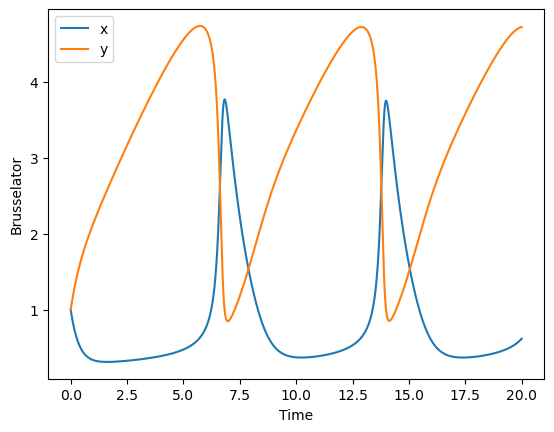

In [2]:
#a)
# For B = 3, use a numerical integrator to calculate the solution for 0 ≤ t ≤ 20
# with initial conditions x(0) = 1 and y(0) = 1. Plot the resulting time series as the
# trajectory converges onto a limit cycle, showing both x and y against t.

from Equations_Functions import brusselator
from new_ode_solver import solve_ode

pars = [3] # B (A is fixed = 1)
y0 = np.array([1, 1])
t, x = solve_ode(brusselator, (0, 20), y0, method='rk4', h=0.01, pars=pars)
plt.plot(t, x[:, 0], label='x')
plt.plot(t, x[:, 1], label='y')
plt.xlabel('Time')
plt.ylabel('Brusselator')
plt.legend()
plt.show()

The starting point: 0.37, 3.51 values and period: 14.33 for the Brusselator orbit


/Users/edatkinson/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


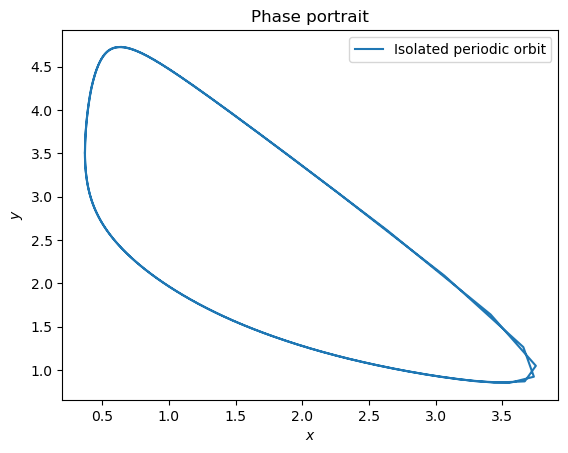

In [3]:
#b)
# For B = 3, use numerical shooting along with a suitable phase condition to identify
# the coordinates of a starting point along the limit cycle. Determine the oscillation
# period to two decimal places.
from scipy.optimize import fsolve
from bvp_and_shooting import phase_condition, shoot, limit_cycle_finder, phase_portrait_plotter


pars = [3] #A & B
y0 = np.array([0.5,4,12])
orbit, cycle1 = limit_cycle_finder(brusselator, y0,phase_condition,pars)
print(f'The starting point: {", ".join([f"{val:.2f}" for val in orbit[:-1]])} values and period: {orbit[-1]:.2f} for the Brusselator orbit')
fig1 = phase_portrait_plotter(cycle1) #plot the limit cycle
plt.show()

/Users/edatkinson/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


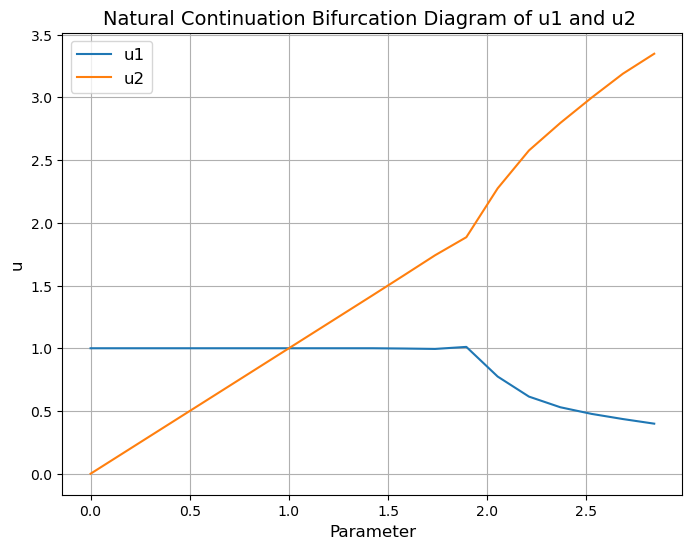

In [4]:
# (c) For 2 ≤ B ≤ 3, use natural-parameter continuation to find the branch of limit cycles
# that emerge from the Hopf bifurcation at B = 2.
from numerical_continuation import natural_continuation, plotter

steps = 20
initial_guess = np.array([2, 4.0, 7])    #np.array([0.2,0.5,35]) works with mybvp
param_bounds = [3,0]

limit_cycle, param_values, eq = natural_continuation(
    brusselator, 
    initial_guess, 
    steps, 
    param_bounds, 
    phase_condition)


# #Bifurcation diagram of Limit cycle and equilibria
plotter(param_values, limit_cycle, eq)

Parameter boundary reached or exceeded.


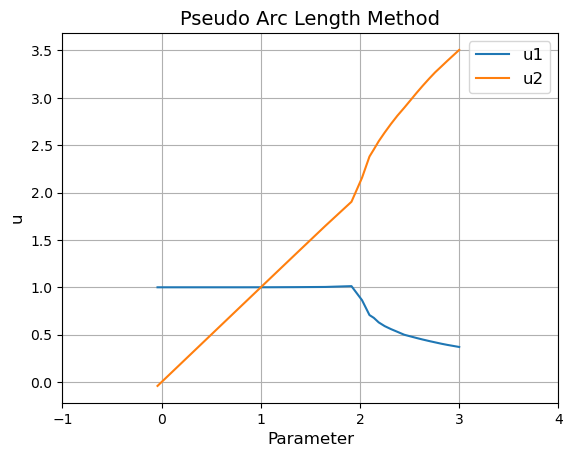

In [5]:
# Pseudo Arc Length
from numerical_continuation import pseudo_continuation
max_steps = 50
x0 = np.array([3.4, 3.2, 6.2])
par_array = [3]  # Start parameter value
par_index = 0
min_par = 0
max_par = 3

sol = pseudo_continuation(brusselator, x0, par_array, par_index, min_par, max_par, max_steps)
plt.plot(sol[3, :], sol[0, :], label='u1')
plt.plot(sol[3, :], sol[1, :], label='u2')
plt.xlabel('Parameter', fontsize=12)
plt.xlim(-1, 4)
plt.ylabel('u', fontsize=12)
plt.title('Pseudo Arc Length Method', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()